In [1]:
import Pkg; 
Pkg.add("Distributions")
Pkg.add("ProgressBars")
Pkg.add("Statistics")
Pkg.add("PyPlot")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %=========>                               ]  22.2 %]  44.1 %===========================>             ]  66.3 %============================>            ]  67.9 % Resolving package versions...
 Installed FillArrays ─ v0.9.4
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [1a297f60] ↑ FillArrays v0.9.2 ⇒ v0.9.4
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes

In [1]:
using Distributions,ProgressBars,Statistics,Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
function ArgMax(Arr)
    max_indices = findall(Arr .== maximum(Arr))
    n = length(max_indices)
    idx = rand(1:n)
    a = max_indices[idx]
    return a
end

function LenientTS(mu,eps)
    k::Int = 2 #number of arms
    N = zeros(k);
    S = zeros(k);
    theta = zeros(k);
    mu_hat = zeros(k);
    alpha = zeros(k);
    beta = zeros(k);
    T::Int = 1000
    for i in (1:T)
        for a in 1:k
            if mu_hat[a] > (1-eps)
                theta[a] = mu_hat[a]
            else
                alpha[a] = floor(S[a]/(1-eps)) + 1
                beta[a] = N[a] + 2 - alpha[a]
                beta_distr = Beta(alpha[a],beta[a])
                Y = rand(beta_distr)
                theta[a] = (1-eps)*Y
            end
        end
        a = ArgMax(theta)
        N[a] = N[a] + 1
        bern_distr = Bernoulli(mu[a])
        X = rand(bern_distr)
        S[a] = S[a] + X
        mu_hat[a] = S[a]/N[a]
    end
    return N
end

LenientTS (generic function with 1 method)

In [18]:
runs = 100
trials = 1
N1 = zeros(2,trials,runs)
N2 = zeros(2,trials,runs)
for i in ProgressBar(1:runs)
    for t in 1:trials
        eps = 0.2
        temp = 0.2
        mu = [0.5,temp]
        N1[:,t,i] = LenientTS(mu,eps)
        eps = 0.0
        N2[:,t,i] = LenientTS(mu,eps)
    end
end


100.0%┣██████████████████████████████████████████████████████████┫ 100/100 [00:01<00:00, 171.5 it/s]


In [21]:
reg_count1 = zeros(trials)
reg_count2 = zeros(trials)
for i in 1:trials
    reg_count1[i] = mean(N1[2,i,:])
    reg_count2[i] = mean(N2[2,i,:])
end

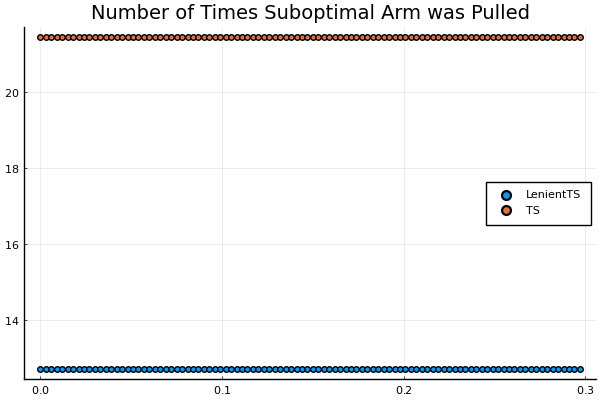

In [22]:
x = (0:runs-1)/runs*(0.5-0.2)
scatter(x,reg_count1,label="LenientTS",title="Number of Times Suboptimal Arm was Pulled")
scatter!(x,reg_count2,label="TS")

In [23]:
N1

2×1×100 Array{Float64,3}:
[:, :, 1] =
 976.0
  24.0

[:, :, 2] =
 994.0
   6.0

[:, :, 3] =
 990.0
  10.0

...

[:, :, 98] =
 992.0
   8.0

[:, :, 99] =
 993.0
   7.0

[:, :, 100] =
 993.0
   7.0

In [24]:
N2

2×1×100 Array{Float64,3}:
[:, :, 1] =
 919.0
  81.0

[:, :, 2] =
 990.0
  10.0

[:, :, 3] =
 977.0
  23.0

...

[:, :, 98] =
 982.0
  18.0

[:, :, 99] =
 989.0
  11.0

[:, :, 100] =
 992.0
   8.0